In [1]:
#Import Libaries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Import Datase 
dataset = pd.read_csv("./weatherHistory.csv")
dataset = dataset.drop(['Formatted Date','Summary','Precip Type','Loud Cover','Daily Summary'],axis=1)

features = dataset.drop('Humidity', axis=1)
target = dataset['Humidity']



In [3]:
# SPlit Data 

x_train, x_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test  = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)


In [4]:
#Standarize 

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_val = scaler.fit_transform(x_val)


In [5]:
#Build Model 

model = Sequential([
    Dense(32,activation='relu',input_dim=x_train.shape[1]),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam',loss='mae',metrics=['mse'])
#Mean Absoulute Error
#Mean Score Error

c:\Anaconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#
history = model.fit(x_train, y_train, epochs=50,batch_size=256, validation_data=(x_val,y_val))

Epoch 1/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4173 - mse: 0.3106 - val_loss: 0.0982 - val_mse: 0.0173
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0960 - mse: 0.0166 - val_loss: 0.0918 - val_mse: 0.0155
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0926 - mse: 0.0155 - val_loss: 0.0898 - val_mse: 0.0146
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0899 - mse: 0.0147 - val_loss: 0.0883 - val_mse: 0.0146
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0880 - mse: 0.0143 - val_loss: 0.0862 - val_mse: 0.0139
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0864 - mse: 0.0138 - val_loss: 0.0870 - val_mse: 0.0142
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0857 - mse: 0.0137 - val_loss: 0.0850 - val_mse: 0.0136
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0850 - mse: 0.0135 - val_loss: 0.0845 - val_mse: 0.0134
Epoch 9/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [7]:
# Evaluate 
loss,mse = model.evaluate(x_test, y_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.0791 - mse: 0.0121


In [8]:
# Predict 
predictions = model.predict(x_test[:20])
actual = np.array(y_test[:20])

for i in range(20):
    print(f"Prediction: {predictions[i]}, Actual : {actual[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: [0.61251956], Actual : 0.56
Prediction: [0.936075], Actual : 0.92
Prediction: [0.5186978], Actual : 0.49
Prediction: [0.77059126], Actual : 0.87
Prediction: [0.87249255], Actual : 0.89
Prediction: [0.86845076], Actual : 0.78
Prediction: [0.52369297], Actual : 0.69
Prediction: [0.29368418], Actual : 0.32
Prediction: [0.72702974], Actual : 0.56
Prediction: [0.36177927], Actual : 0.34
Prediction: [0.8113352], Actual : 0.87
Prediction: [0.92924905], Actual : 0.92
Prediction: [0.8618059], Actual : 0.88
Prediction: [0.87934965], Actual : 0.92
Prediction: [0.9264631], Actual : 0.99
Prediction: [0.8306571], Actual : 0.7
Prediction: [0.7177764], Actual : 0.71
Prediction: [0.774408], Actual : 0.76
Prediction: [0.81773007], Actual : 0.96
Prediction: [0.9227427], Actual : 0.89


Text(0.5, 1.0, 'Model Loss')

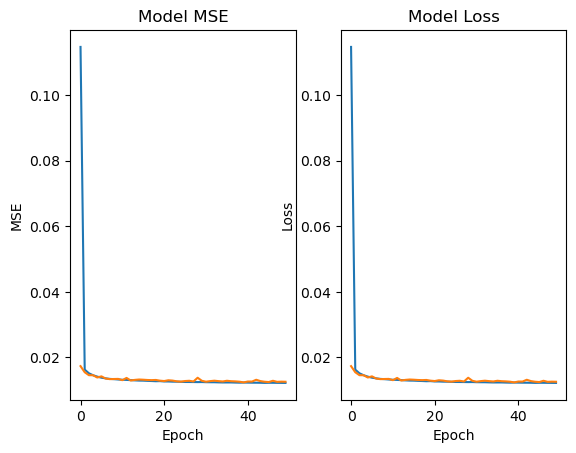

In [12]:
#Plotting 
plt.subplot(1,2,1)
plt.plot(history.history['mse'],label ='training MSE')
plt.plot(history.history['val_mse'],label='Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Model MSE')

plt.subplot(1,2,2)
plt.plot(history.history['mse'],label ='training MSE')
plt.plot(history.history['val_mse'],label='Validation MSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')